<a href="https://colab.research.google.com/github/snigybee/IBMPROJ6/blob/main/Drug_safety_and_pharmacovigilance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# reading the .csv file
df_drug = pd.read_csv('Drug safety and pharmacovigilance.csv')

# checking the structure of the dataset
print(df_drug.shape)

# printing all column names
print(df_drug.columns)

(200, 6)
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
#Check for total nulls, if 0, will check for which column there is null
df_drug.isna().sum().sum()

# there are no columns with any null values

0

In [ ]:
# checking the split based on BP level
df_drug['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [ ]:
# checking the split based on Sex
df_drug['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [ ]:
# checking the split based on Drug
df_drug['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


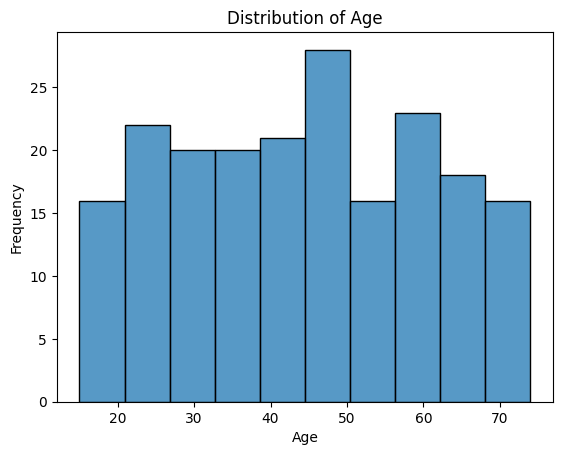

In [ ]:
# Checking the distribution of Age via plotting a histogram
age = df_drug['Age']

sns.histplot(age,bins=10)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# function to return age type based on age
def categorize_age(age):
  if age <= 30:
    return 'Young'
  elif age <= 50:
    return 'Middle-aged'
  else:
    return 'Old'

# Apply the above function to create a new column 'Age_Category'
df_drug['Age_Category'] = df_drug['Age'].apply(categorize_age)
df_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_Category
0,23,F,HIGH,HIGH,25.355,DrugY,Young
1,47,M,LOW,HIGH,13.093,drugC,Middle-aged
2,47,M,LOW,HIGH,10.114,drugC,Middle-aged
3,28,F,NORMAL,HIGH,7.798,drugX,Young
4,61,F,LOW,HIGH,18.043,DrugY,Old
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,Old
196,16,M,LOW,HIGH,12.006,drugC,Young
197,52,M,NORMAL,HIGH,9.894,drugX,Old
198,23,M,NORMAL,NORMAL,14.020,drugX,Young


In [ ]:
df_drug['age_cholesterol'] = df_drug['Age_Category'] + '_' + df_drug['Cholesterol'] + '_Cholesterol'
df_drug['age_cholesterol'].value_counts()

,count
age_cholesterol,
Middle-aged_NORMAL_Cholesterol,46
Old_HIGH_Cholesterol,43
Middle-aged_HIGH_Cholesterol,33
Old_NORMAL_Cholesterol,30
Young_HIGH_Cholesterol,27
Young_NORMAL_Cholesterol,21


In [ ]:
df_drug.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

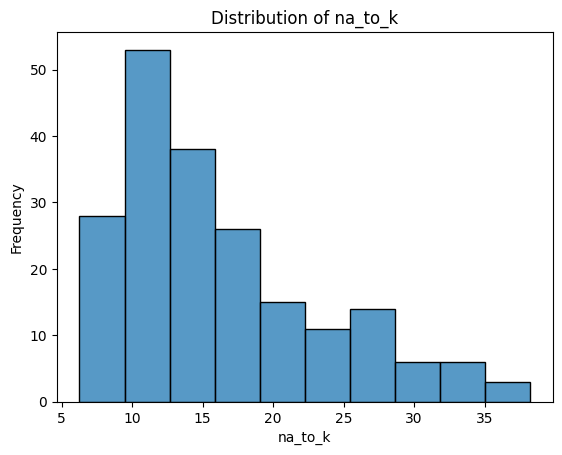

In [ ]:
# Checking the distribution of Na_to_K ratio via plotting a histogram
na_to_k = df_drug['Na_to_K']

sns.histplot(na_to_k,bins=10)

plt.title('Distribution of na_to_k')
plt.xlabel('na_to_k')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Checking if there is any pattern between age of a person to na_to_k ratio value
df_male_subset = df_drug[df_drug['Sex'] == 'M']
df_female_subset = df_drug[df_drug['Sex'] == 'F']

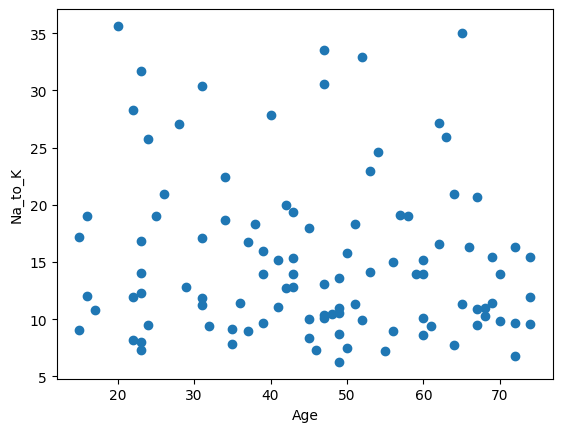

In [ ]:
plt.scatter(df_male_subset['Age'], df_male_subset['Na_to_K'])
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

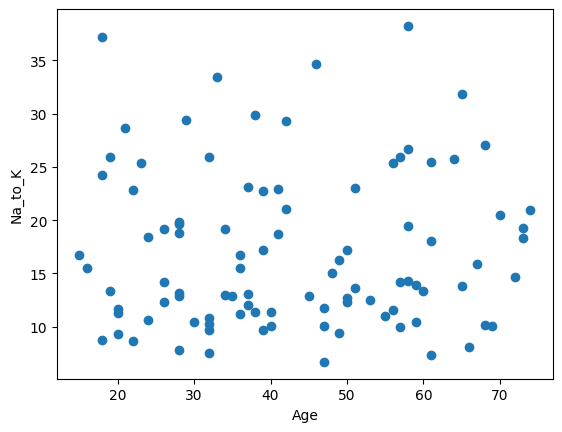

In [ ]:
plt.scatter(df_female_subset['Age'], df_female_subset['Na_to_K'])
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.show()

<Axes: xlabel='Na_to_K', ylabel='Count'>

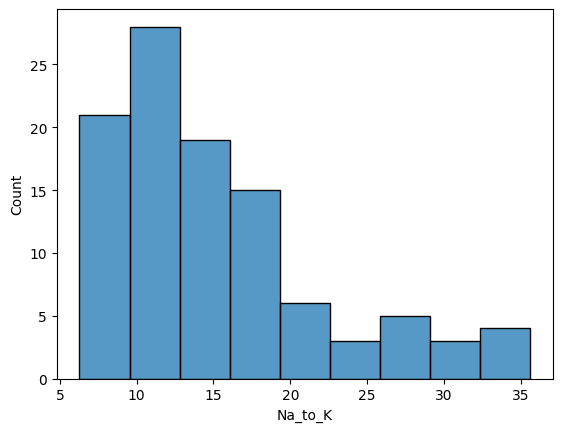

In [ ]:
df_drug

cond_females_only = df_drug['Sex']=='F'

sns.histplot(df_drug[cond_females_only]['Na_to_K'])

Text(0.5, 0, 'Sex')

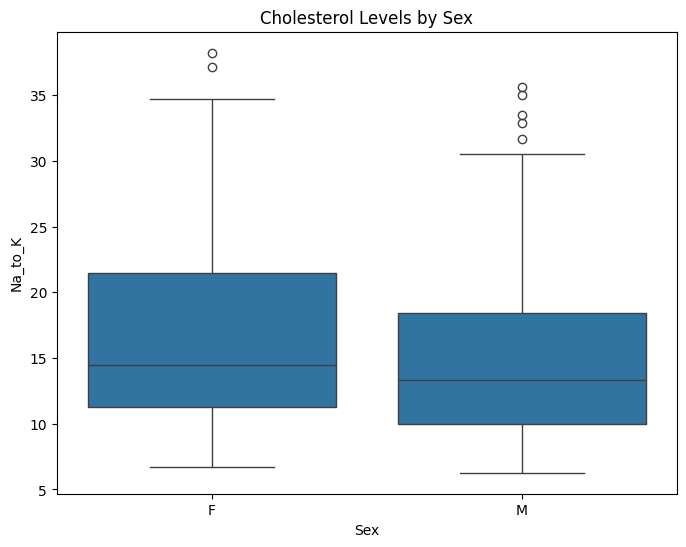

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Na_to_K', data=df_drug)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')

Text(0.5, 0, 'Cholesterol')

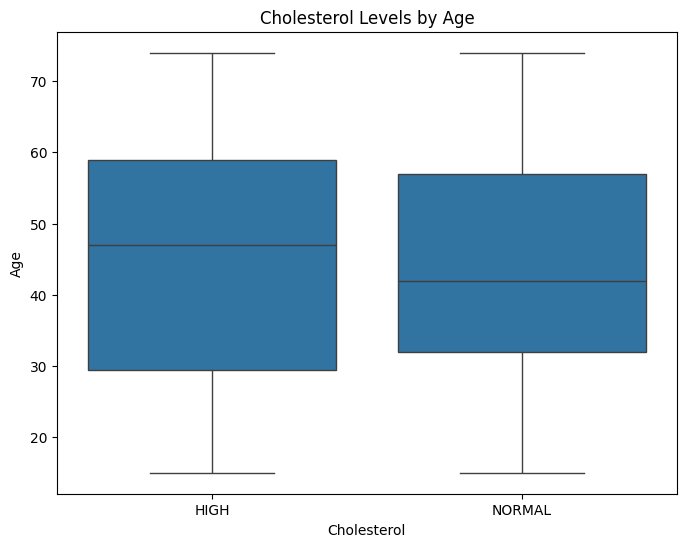

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cholesterol', y='Age', data=df_drug)
plt.title('Cholesterol Levels by Age')
plt.xlabel('Cholesterol')

In [ ]:
df_drug.groupby(['Age_Category','Cholesterol']).count().reset_index()




,Age_Category,Cholesterol,Age,Sex,BP,Na_to_K,Drug,age_cholesterol
0,Middle-aged,HIGH,33,33,33,33,33,33
1,Middle-aged,NORMAL,46,46,46,46,46,46
2,Old,HIGH,43,43,43,43,43,43
3,Old,NORMAL,30,30,30,30,30,30
4,Young,HIGH,27,27,27,27,27,27
5,Young,NORMAL,21,21,21,21,21,21


In [ ]:
df_drug.sort_values(by='Age')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_Category,age_cholesterol
99,15,F,HIGH,NORMAL,16.725,DrugY,Young,Young_NORMAL_Cholesterol
39,15,M,NORMAL,HIGH,9.084,drugX,Young,Young_HIGH_Cholesterol
121,15,M,HIGH,NORMAL,17.206,DrugY,Young,Young_NORMAL_Cholesterol
196,16,M,LOW,HIGH,12.006,drugC,Young,Young_HIGH_Cholesterol
15,16,F,HIGH,NORMAL,15.516,DrugY,Young,Young_NORMAL_Cholesterol
...,...,...,...,...,...,...,...,...
175,73,F,HIGH,HIGH,18.348,DrugY,Old,Old_HIGH_Cholesterol
13,74,F,LOW,HIGH,20.942,DrugY,Old,Old_HIGH_Cholesterol
31,74,M,HIGH,HIGH,9.567,drugB,Old,Old_HIGH_Cholesterol
143,74,M,HIGH,NORMAL,15.436,DrugY,Old,Old_NORMAL_Cholesterol


In [ ]:
df_drug.groupby(['Age']).count().reset_index()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_Category,age_cholesterol
0,15,3,3,3,3,3,3,3
1,16,3,3,3,3,3,3,3
2,17,1,1,1,1,1,1,1
3,18,3,3,3,3,3,3,3
4,19,2,2,2,2,2,2,2
5,20,4,4,4,4,4,4,4
6,21,1,1,1,1,1,1,1
7,22,5,5,5,5,5,5,5
8,23,7,7,7,7,7,7,7
9,24,4,4,4,4,4,4,4
